In [8]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sympy.stats import QuadraticU, density
import math
from sklearn.metrics import roc_auc_score, accuracy_score

# Swiss Data

In [9]:
df = []
for m in ["log", "rf", "dt"]:
    for i in range(5):
        d = pd.read_csv("../../data/swiss_results/swiss_"+m+str(i)+".csv")
        d["model"] = m
        df.append(d)
df = pd.concat(df)

In [10]:
df.head()

,y,female,swiss,risk,risk_b0,risk_b1,risk_b2,risk_b3,risk_b4,risk_b5,risk_b6,risk_b7,risk_b8,risk_b9,risk_b10,outlier_pval,model
0,0,0,1,0.352804,0.355613,0.350650,0.347655,0.356476,0.355933,0.349234,0.356846,0.347407,0.324071,0.353881,0.342808,0.681126,log
1,0,0,1,0.439512,0.445326,0.444067,0.430911,0.451289,0.439406,0.438055,0.429500,0.436472,0.413004,0.439719,0.437915,0.505035,log
2,0,0,1,0.667812,0.665633,0.685286,0.660293,0.674106,0.661439,0.696017,0.682662,0.671830,0.666839,0.653868,0.651031,0.715444,log
3,1,0,0,0.500553,0.504800,0.506539,0.493929,0.497828,0.497001,0.490850,0.496002,0.495222,0.512958,0.489919,0.494287,0.261732,log
4,1,0,1,0.642582,0.629865,0.651777,0.630726,0.631555,0.633485,0.633078,0.646160,0.643237,0.614935,0.638030,0.641345,0.429611,log


In [11]:
df["y"].sum()/len(df)

0.4376269238137812

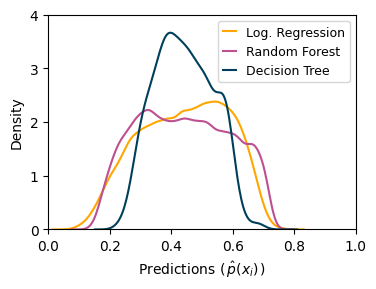

In [12]:
plt.rcParams["figure.figsize"] = [4,3]
fig, ax = plt.subplots()

sns.kdeplot(df.loc[df["model"]=="log", "risk"], color="#ffa600", clip=[0,1], label="Log. Regression")
sns.kdeplot(df.loc[df["model"]=="rf", "risk"], color="#bc5090", clip=[0,1], label="Random Forest")
sns.kdeplot(df.loc[df["model"]=="dt", "risk"], bw_adjust=2, color="#003f5c", clip=[0,1], label="Decision Tree")
#sns.kdeplot(df["risk"], bw_adjust=2, color="k", clip=[0,1], label="All Models")

plt.ylabel("Density")
plt.xlabel("Predictions ($\\,\\hat{p}(x_i)\\,$)")

plt.xlim([0,1])
plt.ylim([0,4])
plt.legend(handlelength=1, fontsize=9)
fig.tight_layout()
plt.savefig('2_swiss_distribution.jpg', format='jpg', dpi=500)
plt.show()

In [13]:
# Accuracy

for m in ["log", "rf", "dt"]:
    curr = df.loc[df["model"]==m]
    print(m)
    print("AUC", roc_auc_score(curr["y"], curr["risk"]))
    print("Accuracy", accuracy_score(curr["y"], np.round(curr["risk"])))
    print()

log
AUC 0.6676900744526177
Accuracy 0.6308831981608021

rf
AUC 0.678387670315779
Accuracy 0.6389680056197714

dt
AUC 0.6655342856737432
Accuracy 0.6290823168784725



In [16]:
print("Male Risk", round(np.mean(df.loc[df["female"]==0, "risk"]),5))
print("Female Risk", round(np.mean(df.loc[df["female"]==1, "risk"]),5))
print("Swiss Risk", round(np.mean(df.loc[df["swiss"]==1, "risk"]),5))
print("Foreign Risk", round(np.mean(df.loc[df["swiss"]==0, "risk"]),5))

Male Risk 0.44977
Female Risk 0.43096
Swiss Risk 0.493
Foreign Risk 0.36017


In [17]:
print("Male P-Value", round(np.mean(df.loc[df["female"]==0, "outlier_pval"]),5))
print("Female P-Value", round(np.mean(df.loc[df["female"]==1, "outlier_pval"]),5))
print("Swiss P-Value", round(np.mean(df.loc[df["swiss"]==1, "outlier_pval"]),5))
print("Foreign P-Value", round(np.mean(df.loc[df["swiss"]==0, "outlier_pval"]),5))

Male P-Value 0.50016
Female P-Value 0.49877
Swiss P-Value 0.65148
Foreign P-Value 0.25953


# Census Data

In [13]:
df = []
for m in ["log", "rf", "dt"]:
    for i in range(5):
        d = pd.read_csv("../../data/census_results/ca_income_"+m+str(i)+".csv")
        d["model"] = m
        df.append(d)
df = pd.concat(df)

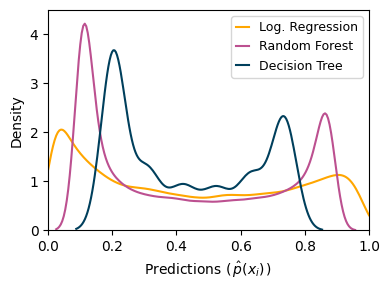

In [14]:
plt.rcParams["figure.figsize"] = [4,3]
fig, ax = plt.subplots()

sns.kdeplot(df.loc[df["model"]=="log", "risk"], color="#ffa600", clip=[0,1], label="Log. Regression")
sns.kdeplot(df.loc[df["model"]=="rf", "risk"], color="#bc5090", clip=[0,1], label="Random Forest")
sns.kdeplot(df.loc[df["model"]=="dt", "risk"], bw_adjust=2, color="#003f5c", clip=[0,1], label="Decision Tree")
#sns.kdeplot(df["risk"], bw_adjust=2, color="k", clip=[0,1], label="All Models")

plt.ylabel("Density")
plt.xlabel("Predictions ($\\,\\hat{p}(x_i)\\,$)")

plt.xlim([0,1])
plt.ylim([0,4.5])
plt.legend(handlelength=1, fontsize=9)
fig.tight_layout()
plt.savefig('census_distribution.jpg', format='jpg', dpi=500)
plt.show()

In [30]:
# Accuracy

for m in ["log", "rf", "dt"]:
    curr = df.loc[df["model"]==m]
    print(m)
    print("AUC", roc_auc_score(curr["y"], curr["risk"]))
    print("Accuracy", accuracy_score(curr["y"], np.round(curr["risk"])))
    print()

log
AUC 0.8726753828881737
Accuracy 0.7912514941125607

rf
AUC 0.864874584458256
Accuracy 0.7845731288624399

dt
AUC 0.8288442977025355
Accuracy 0.7662165255207142



In [31]:
print("Male Risk", round(np.mean(df.loc[df["sex"]==1, "risk"]),5))
print("Female Risk", round(np.mean(df.loc[df["sex"]==0, "risk"]),5))
print("White Risk", round(np.mean(df.loc[df["race"]==1, "risk"]),5))
print("NonWhite Risk", round(np.mean(df.loc[df["race"]==0, "risk"]),5))

Male Risk 0.45595
Female Risk 0.40981
White Risk 0.45382
NonWhite Risk 0.40253


In [32]:
print("Male P-Value", round(np.mean(df.loc[df["sex"]==1, "outlier_pval"]),5))
print("Female P-Value", round(np.mean(df.loc[df["sex"]==0, "outlier_pval"]),5))
print("White P-Value", round(np.mean(df.loc[df["race"]==1, "outlier_pval"]),5))
print("NonWhite P-Value", round(np.mean(df.loc[df["race"]==0, "outlier_pval"]),5))

Male P-Value 0.50762
Female P-Value 0.49116
White P-Value 0.53283
NonWhite P-Value 0.44661
